## Análisis de las ventas de desodorantes en aerosol 

In [93]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plot_functions import plot_sales_chart, plot_piechart, plot_scatter, plot_box

In [94]:
deodorants_df = pd.read_csv("../data/deodorants_final_merged_v1.csv",
                            parse_dates=['fecha_trans'])

In [95]:
deodorants_df.drop('estacion', axis=1, inplace=True)

In [ ]:
deodorants_df.info()

In [4]:
# check for null or NaN values in each column
null_cols = deodorants_df.isnull().any()

# print columns with null or NaN values
print(null_cols[null_cols == True].index.tolist())

[]


In [5]:
# Total sales with negative values
print(
    f'Total de ventas con valores negativos: {deodorants_df[deodorants_df["venta_unidades"] < 0]["venta_unidades"].count()}'
)

Total de ventas con valores negativos: 0


In [6]:
grouped_data = deodorants_df.groupby(['idb'
                                      ]).venta_unidades.count().reset_index()
grouped_data

,idb,venta_unidades
0,242,28452
1,247,56697
2,249,41863
3,252,21088
4,257,74383
...,...,...
137,9704,66231
138,9706,66730
139,9942,69347
140,9973,28658


In [15]:
idbs_unicos = deodorants_df['idb'].unique().tolist()
idbs_unicos

[5205,
 9026,
 5263,
 9030,
 9159,
 9003,
 9122,
 9016,
 5961,
 9247,
 9038,
 5277,
 691,
 9121,
 9050,
 674,
 270,
 5218,
 9973,
 9240,
 9022,
 9697,
 242,
 9630,
 9018,
 5207,
 9703,
 688,
 249,
 263,
 5214,
 5626,
 9045,
 677,
 257,
 5204,
 5034,
 686,
 9248,
 9163,
 9004,
 9636,
 9696,
 669,
 9155,
 9020,
 9138,
 9633,
 9062,
 9706,
 9056,
 9023,
 5208,
 5260,
 9235,
 9241,
 9054,
 9042,
 9015,
 5201,
 9704,
 9048,
 430,
 9009,
 9692,
 752,
 9037,
 266,
 277,
 631,
 854,
 9111,
 9977,
 9701,
 5202,
 9035,
 9006,
 5213,
 247,
 767,
 9112,
 5206,
 9234,
 685,
 9231,
 5211,
 9059,
 9055,
 9046,
 9161,
 9039,
 9628,
 6943,
 9154,
 9152,
 9010,
 9700,
 9153,
 711,
 9058,
 9942,
 5259,
 9665,
 741,
 9164,
 9162,
 9698,
 9025,
 9638,
 9119,
 5231,
 9049,
 9012,
 9001,
 9160,
 9640,
 9005,
 740,
 9057,
 9127,
 9165,
 252,
 9237,
 668,
 9002,
 9662,
 9158,
 5275,
 9014,
 9156,
 9019,
 285,
 9036,
 9107,
 9137,
 9702,
 5276,
 9024,
 9217,
 9011,
 9157,
 707]

In [7]:
# Before replacement
neg_count = deodorants_df[
    deodorants_df['stock_unidades'] < 0]['stock_unidades'].count()
print(f"Total de stock con valor negativo: {neg_count}")

# Replacing negative values with 0
deodorants_df.loc[deodorants_df['stock_unidades'] < 0, 'stock_unidades'] = 0

# After replacement
neg_count = deodorants_df[
    deodorants_df['stock_unidades'] < 0]['stock_unidades'].count()
print(
    f"Total de stock con valor negativo después de reemplazar con 0: {neg_count}"
)

Total de stock con valor negativo: 0
Total de stock con valor negativo después de reemplazar con 0: 0


In [7]:
idb_grouped  = deodorants_df.groupby('idb').idb.count()
idb_grouped

idb
242     28452
247     56697
249     41863
252     21088
257     74383
        ...  
9704    66231
9706    66730
9942    69347
9973    28658
9977    70925
Name: idb, Length: 142, dtype: int64

In [17]:
unicos = deodorants_df.id_producto.unique().tolist()
unicos

[273921,
 273920,
 468735,
 461280,
 470446,
 470447,
 164146,
 292948,
 238241,
 238243,
 386296,
 370269,
 427445,
 359572,
 427447,
 474300,
 387945,
 421885,
 228683,
 443520,
 443547,
 443521,
 485719,
 454813,
 467198,
 242231,
 454775,
 421884,
 164149,
 292949,
 457746,
 467698,
 249486,
 240911,
 342686,
 450265,
 507526,
 511325,
 415268,
 462447,
 484434,
 385535,
 238237,
 429883,
 447299,
 458392,
 342759,
 474295,
 469286,
 342682,
 292945,
 342743,
 474297,
 370267,
 511326,
 427446,
 370268,
 468734,
 284012,
 511324,
 407845,
 450083,
 242232,
 242234,
 455722,
 462448,
 466069,
 359571,
 228217,
 342689,
 238242,
 249049,
 342679,
 507525,
 402700,
 507527,
 458393,
 238239,
 246791,
 458395,
 468736,
 507528,
 342745,
 458394,
 342762,
 507832,
 387946,
 427444,
 489517,
 450347,
 284013]

In [ ]:
idb que no estan 
9693
9694
9695
9699
9889
961
9007
9017
9151
9205
9639
248
250
255
9031
5227
5459
5460
8201
8227
8262
8302
8303
8306
8311
8314
8318
8331
1190
1914
305
5299
5300


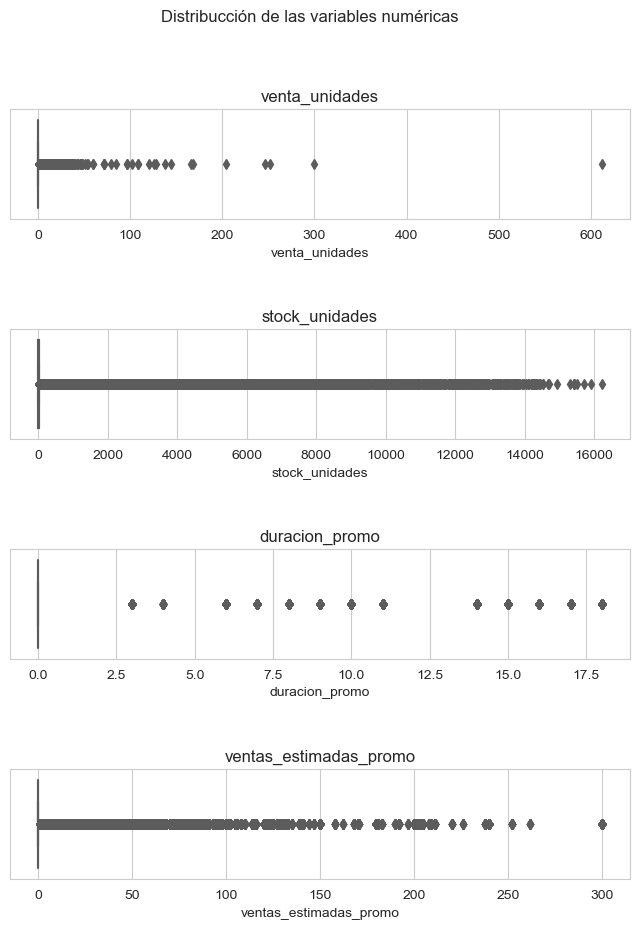

In [9]:
cols_num = [
    'venta_unidades', 'stock_unidades', 'duracion_promo',
    'ventas_estimadas_promo'
]
plot_box(deodorants_df,
         cols_num,
         title='Distribucción de las variables numéricas',
         figsize=(8, 10),
         nrows=4,
         savefig='valores_outliers')

In [12]:
ventas_outliers = deodorants_df[deodorants_df['venta_unidades']>=300]
ventas_outliers

,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,estacion,zona
4174841,9217,342686,2017-08-30,5838,612,19.63,0,0,8,2017,...,0,1,glade desodorante de ambientes lavander nueva ...,s. c. johnson y son de arg. s.a.,1,Wednesday,0,0,verano,4
4177183,9217,342745,2017-08-30,2400,300,19.63,0,0,8,2017,...,0,1,glade desodorante de ambientes jazmin nueva fo...,s. c. johnson y son de arg. s.a.,1,Wednesday,0,0,verano,4


In [11]:
import plotly.graph_objects as go
import pandas as pd

# Crear el histograma usando Plotly
fig = go.Figure(data=[go.Histogram(x=deodorants_df["venta_unidades"], nbinsx=20)])

# Personalizar el diseño del histograma
fig.update_layout(
    title="Histograma de Ventas de Desodorantes",
    xaxis_title="Ventas de unidades",
    yaxis_title="Frecuencia"
)

# Guardar la figura como una imagen
fig.write_image("images/ventas_hist.png")

In [12]:
def get_zone(latitude, longitude):
    """
    Assigns a zone number to a given latitude and longitude coordinate.

    Args:
        latitude (float): The latitude coordinate.
        longitude (float): The longitude coordinate.

    Returns:
        zone (int): The zone number for the given coordinates.
    """
    if latitude >= -34.0 and longitude >= -58.0:
        return 1
    elif latitude >= -34.0 and longitude < -58.0:
        return 2
    elif latitude < -34.0 and longitude >= -58.0:
        return 3
    else:
        return 4

In [13]:
deodorants_df['zona'] = deodorants_df.apply(
    lambda x: get_zone(x['latitud'], x['longitud']), axis=1)

In [14]:
ventas_by_zone_and_local = deodorants_df.groupby(
    ['zona', 'idb'])['venta_unidades'].sum().reset_index()
ventas_by_zone_and_local = ventas_by_zone_and_local.sort_values(
    by='venta_unidades', ascending=False)
ventas_by_zone_and_local

,zona,idb,venta_unidades
47,4,5202,95129
50,4,5206,85398
53,4,5211,68726
48,4,5204,62988
52,4,5208,58303
...,...,...,...
35,4,285,2870
73,4,9011,2071
39,4,707,1018
61,4,5276,881


In [15]:
ventas_by_zone = deodorants_df.groupby([
    'zona'
])['venta_unidades'].sum().reset_index().sort_values(by='venta_unidades',
                                                      ascending=False)
ventas_by_zone

,zona,venta_unidades
3,4,2166156
2,3,306298
1,2,122612
0,1,26624


In [16]:
# Filter the rows that need to be deleted
to_delete = deodorants_df.loc[
    (deodorants_df.venta_unidades == 0) & 
    (deodorants_df.desc_producto == 'missing') &
    (deodorants_df.razon_social == 'unknown') &
    (deodorants_df.stock_unidades == 0) &
    (deodorants_df.tiene_promo == 0) &
    (deodorants_df.nro_prom == 0.0) 
    
]

# Get the count of rows to be deleted
count_to_delete = len(to_delete)

# Delete the rows from the original dataframe
deodorants_df.drop(to_delete.index, inplace=True)

print(f'size before deleting: {len(deodorants_df)}')
print(f'Rows to delete: {count_to_delete}')
print(f'size after deleting: {len(deodorants_df)}')

size before deleting: 8272128
Rows to delete: 0
size after deleting: 8272128


In [18]:
filtered_df = deodorants_df[[
    'stock_unidades', 'venta_unidades', 'ventas_estimadas_promo',
    'precio_unitario', 'duracion_promo'
]]

In [19]:
stats = filtered_df.describe()

In [20]:
stats = stats.round(3)

# Create a Plotly table
table = go.Table(
    header=dict(values=['Statistic'] + list(stats.columns),
                fill_color="lightsteelblue",
                font=dict(color='white', size=14),
                align='center'),
    cells=dict(
        values=[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] +
        [stats[col] for col in stats.columns],
        fill_color='#f2f2f2',
        font=dict(color='#404040', size=12),
        align='center'))

# Create a layout for the table
layout = go.Layout(width=900, height=500)

# Create a figure object with the table and layout
fig = go.Figure(data=[table], layout=layout)

# Save the figure as an image file
pio.write_image(fig, 'images/deodorants_stats.png')

In [21]:
deodorants_df.shape

(8272128, 28)

### Preguntas

- ¿Cuáles son los productos con mayor volumen de ventas?

In [27]:
product_grouped_top10 = deodorants_df.groupby(
    ['id_producto', 'desc_producto',
     'razon_social'])['venta_unidades'].sum().sort_values(
         ascending=False).nlargest(10).reset_index()
product_grouped_top10

,id_producto,desc_producto,razon_social,venta_unidades
0,342686,glade desodorante de ambientes lavander nueva ...,s. c. johnson y son de arg. s.a.,109539
1,240911,poett ambiental lavanda nuevo d 0.377 kg,clorox argentina s.a.,100884
2,429883,glade desodorante de ambientes ocean oasis nue...,s. c. johnson y son de arg. s.a.,89352
3,249486,glade toque rep lavandax2 9gr/6 lavanda 9 grm,s. c. johnson y son de arg. s.a.,86759
4,342745,glade desodorante de ambientes jazmin nueva fo...,s. c. johnson y son de arg. s.a.,72912
5,228217,glade toque rep limon 12mlx12 repuesto 12 mlt,s. c. johnson y son de arg. s.a.,68818
6,242234,poett ambiental suavidad de algodon nuevo d 0....,clorox argentina s.a.,68093
7,447299,glade desodorante de ambientes paraiso azul 1 ...,s. c. johnson y son de arg. s.a.,66328
8,292949,glade toque desodorante de ambientes ma�ana ca...,s. c. johnson y son de arg. s.a.,64383
9,242231,poett ambiental primavera nuevo d 0.377 kg,clorox argentina s.a.,62059


In [28]:
product_grouped_top10['desc_producto'] = product_grouped_top10[
    'desc_producto'].replace(to_replace='ma�ana', value='manana', regex=True)

In [29]:
product_grouped_bottom10 = deodorants_df.groupby(
    ['id_producto', 'desc_producto',
     'razon_social'])['venta_unidades'].sum().sort_values(
         ascending=False).nsmallest(10).reset_index()
product_grouped_bottom10

,id_producto,desc_producto,razon_social,venta_unidades
0,511325,missing,unknown,1983
1,284013,missing,unknown,2564
2,466069,glade toque aromatizante de ambientes campos l...,s. c. johnson y son de arg. s.a.,2816
3,511324,pure aerosol air wick cherry blossom 250.00 mlt,reckitt benckiser argentina s.a.,2927
4,511326,air wick pure aerosol soft cotton 250.00 mlt,reckitt benckiser argentina s.a.,3063
5,485719,missing,unknown,3181
6,284012,air wick citrico full rep.gratis 250.00 mlt,reckitt benckiser argentina s.a.,3660
7,415268,freshmatic bosque magico aparato air wick lush...,reckitt benckiser argentina s.a.,4176
8,164146,missing,unknown,5182
9,469286,exotic scents full air wick freshmatic 250.00 mlt,reckitt benckiser argentina s.a.,5576


In [30]:
# concatenate the id_producto and desc_producto columns
product_grouped_bottom10['desc_producto'] = product_grouped_bottom10.apply(
    lambda row: 'id_prod:' + str(row['id_producto']) + ' - ' + row[
        'desc_producto'],
    axis=1)

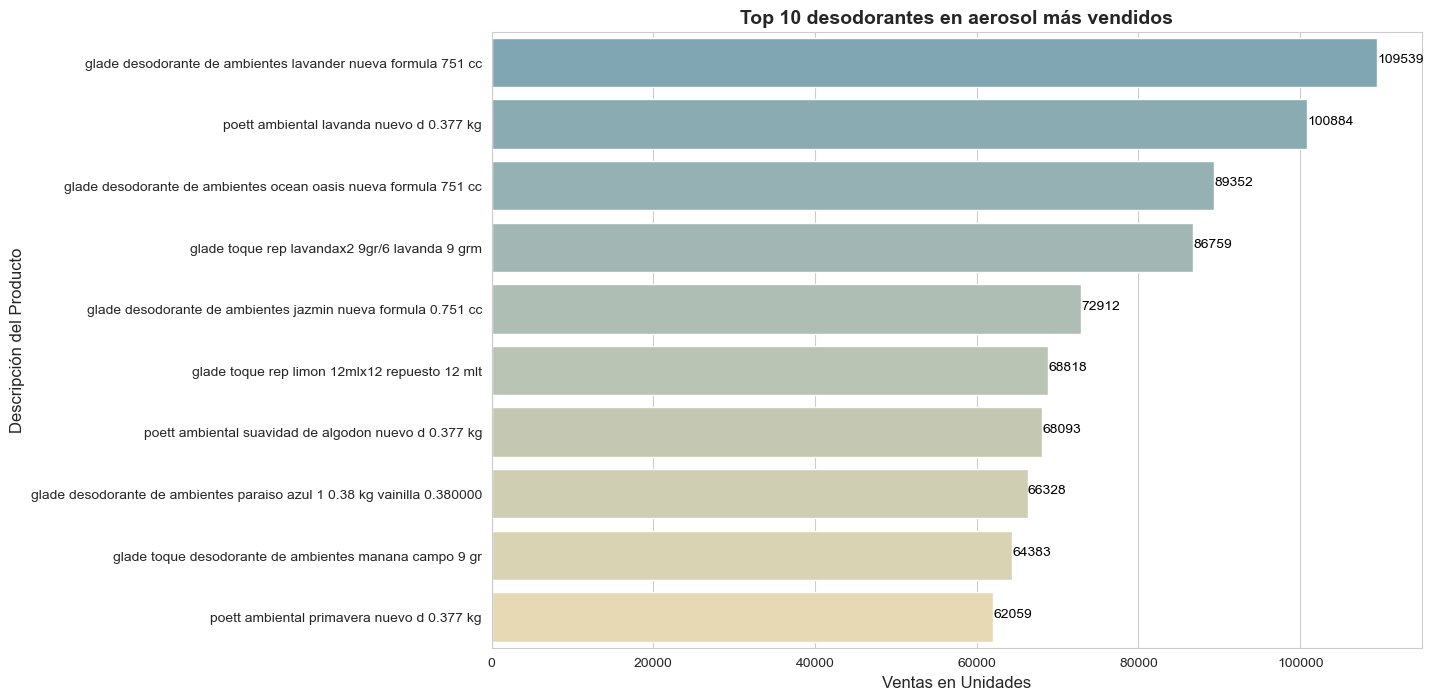

In [31]:
plot_sales_chart(product_grouped_top10,
                 'Top 10 desodorantes en aerosol más vendidos',
                 'ventas_desodorantes_top10', 'venta_unidades',
                 'desc_producto', 'venta_unidades', 'Ventas en Unidades',
                 'Descripción del Producto')

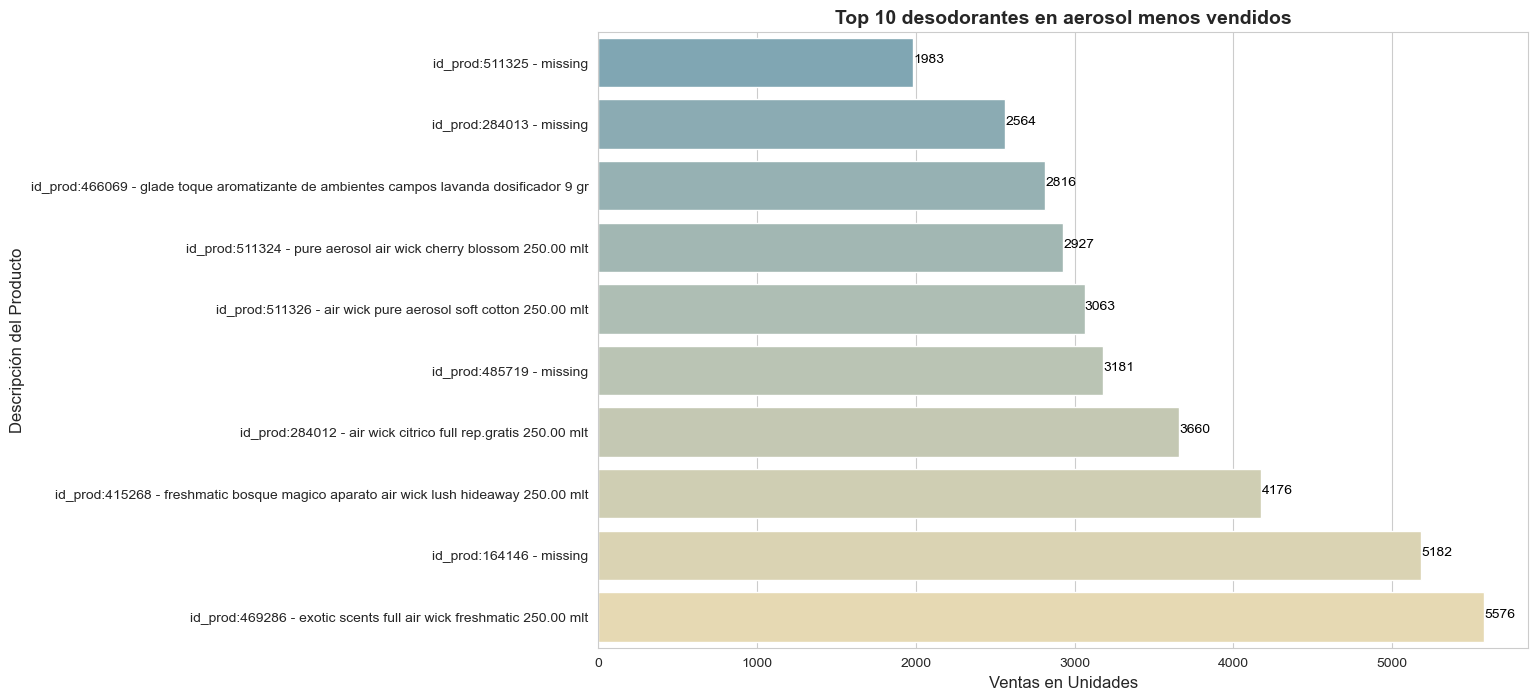

In [32]:
plot_sales_chart(product_grouped_bottom10,
                 'Top 10 desodorantes en aerosol menos vendidos',
                 'ventas_desodorantes_bot10', 'venta_unidades',
                 'desc_producto', 'venta_unidades', 'Ventas en Unidades',
                 'Descripción del Producto')

In [22]:
grouped_zones = deodorants_df.groupby('idb')[['latitud', 'longitud', 'zona']].mean().reset_index()
grouped_zones

,idb,latitud,longitud,zona
0,242,-34.583210,-60.954190,4.0
1,247,-34.565259,-58.436583,4.0
2,249,-34.691168,-58.498985,4.0
3,252,-34.623613,-58.491471,4.0
4,257,-34.446043,-58.745098,4.0
...,...,...,...,...
137,9704,-38.377394,-60.272848,4.0
138,9706,-42.768281,-65.037972,4.0
139,9942,-38.012360,-57.565788,3.0
140,9973,-34.989573,-58.696112,4.0


In [36]:
import folium
from folium.plugins import MarkerCluster

# create the map centered on Buenos Aires
ba_map = folium.Map(location=[-34.6037, -58.3816],
                    zoom_start=12,
                    tiles='OpenStreetMap')

# create a MarkerCluster for the markers
marker_cluster = MarkerCluster().add_to(ba_map)

# add a marker for each group in the "zona" column
for index, row in grouped_zones.iterrows():
    zona = row['zona']
    html = f"<div style='font-size: 12pt'>{zona}</div>"
    
    # add the marker to the MarkerCluster
    folium.Marker(location=[row['latitud'], row['longitud']],
                  popup=row['zona'],
                  icon=folium.Icon(icon='map-marker',
                                   prefix='fa',
                                   color='red'),
                  tooltip=html).add_to(marker_cluster)

# add a layer control to the map
folium.LayerControl().add_to(ba_map)

# save the map as a PNG file
ba_map.save('images/ba_map.png')

# display the map
ba_map


2. ¿Cuál es el local con mayor volumen de ventas y en qué zona se encuentra? 

In [56]:
sales_by_zone = deodorants_df.groupby([
    'idb', 'zona'
])['venta_unidades'].sum().sort_values(ascending=False).reset_index()
sales_by_zone

,idb,zona,venta_unidades
0,5202,4,95129
1,5206,4,85398
2,5211,4,68726
3,5204,4,62988
4,5208,4,58303
...,...,...,...
137,285,4,2870
138,9011,4,2071
139,707,4,1018
140,5276,4,881


In [119]:

# Group the DataFrame by 'id_producto' and 'tiene_promo', and count the number of rows for each group
promo_counts = deodorants_df.groupby(['id_producto', 'tiene_promo'
                                      ]).size().reset_index(name='count')

# Create a Boolean Series indicating if a product has a count for both 'tiene_promo' values
has_both_promos = promo_counts.groupby(
    'id_producto')['tiene_promo'].count() == 2

# Filter the DataFrame to get the products that do not have a count for either 'tiene_promo' value
no_promos = promo_counts[~promo_counts['id_producto'].
                         isin(has_both_promos[has_both_promos].index)]

# Get the unique products IDs that do not have a count for either 'tiene_promo' value
no_promo_products = no_promos['id_producto'].unique()

no_promo_products

     id_producto  tiene_promo   count
8         238237            0  131251
27        249049            0   40486
70        385535            0  143000
79        407845            0   68145
96        443520            0   63286
97        443521            0  142615
98        443547            0  106324
101       450083            0   42616
108       454813            0   66377
139       469286            0   87136
152       485719            0   18849
163       507832            0   32477
164       511324            0   19747
165       511325            0   15049
166       511326            0   19493


array([238237, 249049, 385535, 407845, 443520, 443521, 443547, 450083,
       454813, 469286, 485719, 507832, 511324, 511325, 511326])

In [122]:
deodorants_without_promo = deodorants_df[deodorants_df['id_producto'].isin(
    no_promo_products)]
print(len(deodorants_without_promo))
deodorants_without_promo

996851


,idb,id_producto,fecha_trans,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,mov_month,mov_year,...,latitud,local,punto_dist,desc_producto,razon_social,id_region,dia_semana,is_weekend,tiene_promo,zona
29,5263,443520,2019-07-14,9,0,62.06,1,9217,7,2019,...,-34.609829,1,0,poett natural blends frutal 450 gr,clorox argentina s.a.,1,Sunday,1,0,4
30,5205,443547,2019-07-14,14,0,62.06,1,9217,7,2019,...,-34.565295,1,0,poett natural blends hojas verdes 450 gr,clorox argentina s.a.,1,Sunday,1,0,4
31,9703,443521,2019-07-14,5,0,62.06,1,9217,7,2019,...,-35.050042,1,0,poett natural blends floral 450 gr,clorox argentina s.a.,1,Sunday,1,0,4
32,688,443521,2019-07-14,21,0,62.06,1,9217,7,2019,...,-29.141976,1,0,poett natural blends floral 450 gr,clorox argentina s.a.,1,Sunday,1,0,2
33,249,443521,2019-07-14,11,0,62.06,1,9217,7,2019,...,-34.691168,1,0,poett natural blends floral 450 gr,clorox argentina s.a.,1,Sunday,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272105,9698,443521,2018-01-10,5,0,33.95,1,9217,1,2018,...,-34.989573,1,0,poett natural blends floral 450 gr,clorox argentina s.a.,1,Wednesday,0,0,4
8272124,9240,238237,2018-01-10,12,0,28.42,1,9217,1,2018,...,-34.621736,1,0,poett lavanda full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,4
8272125,9942,385535,2018-01-10,0,0,28.42,1,9217,1,2018,...,-38.012360,1,0,poett primavera full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,3
8272126,9155,238237,2018-01-10,6,0,28.42,1,9217,1,2018,...,-34.655963,1,0,poett lavanda full ab nuevo 0.040 kg,clorox argentina s.a.,1,Wednesday,0,0,4


In [144]:
unique_products = deodorants_without_promo.drop_duplicates(subset=['id_producto'])
unique_products

mean_ventas = unique_products.groupby('id_producto').venta_unidades.mean().reset_index()
mean_ventas

,id_producto,venta_unidades
0,238237,0.0
1,249049,0.0
2,385535,0.0
3,407845,0.0
4,443520,0.0
5,443521,0.0
6,443547,0.0
7,450083,0.0
8,454813,0.0
9,469286,0.0


In [141]:
# filter the dataframe based on venta_unidades == 0
ventas_zero_df = deod_df[deodorants_df['venta_unidades'] == 0]

# group the resulting dataframe by id_producto and desc_producto, and sum the units sold
ventas_zero_grouped = ventas_zero_df.groupby(['id_producto', 'desc_producto'
                                              ])['venta_unidades'].sum()

# reset the index to convert the resulting series to a dataframe
ventas_zero_df = ventas_zero_grouped.reset_index()

ventas_zero_df

,id_producto,desc_producto,venta_unidades
0,164146,missing,0
1,164149,glade toque rep lavanda 9gr/12 ar 9 grm,0
2,228217,glade toque rep limon 12mlx12 repuesto 12 mlt,0
3,228683,glade toque full limon 12mlx12 ar 12 mlt,0
4,238237,poett lavanda full ab nuevo 0.040 kg,0
...,...,...,...
87,507528,glade refrescantes ambientales-electricos auto...,0
88,507832,poett aerosol desodorante ambiental despertar ...,0
89,511324,pure aerosol air wick cherry blossom 250.00 mlt,0
90,511325,missing,0


In [ ]:
# print the resulting dataframe
result = ventas_zero_df[ventas_zero_df['desc_producto'] == 'unknown']
result

In [ ]:
unknown = deod_df['desc_producto']
unknown

In [ ]:
# filter ventas_zero_df based on the condition that id_producto is in no_promo_products list
ventas_zero_in_no_promos = ventas_zero_df[ventas_zero_df['id_producto'].isin(
    no_promo_products)]

# print the resulting dataframe
ventas_zero_in_no_promos

In [ ]:
# create a boolean mask indicating which rows in deodorants_df have an id_producto that is present in ventas_zero_in_no_promos
mask = deod_df['id_producto'].isin(
    ventas_zero_in_no_promos['id_producto'])

# create a new dataframe without the rows that meet the condition
deodorants_df_filtered = deod_df[~mask]

# print the resulting dataframe
len(deodorants_df_filtered)

/var/folders/1b/q0vy8pzj2d5_w7tb8dkfmh2m0000gn/T/ipykernel_40068/737160374.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = sns.heatmap(deodorants_df.corr(),


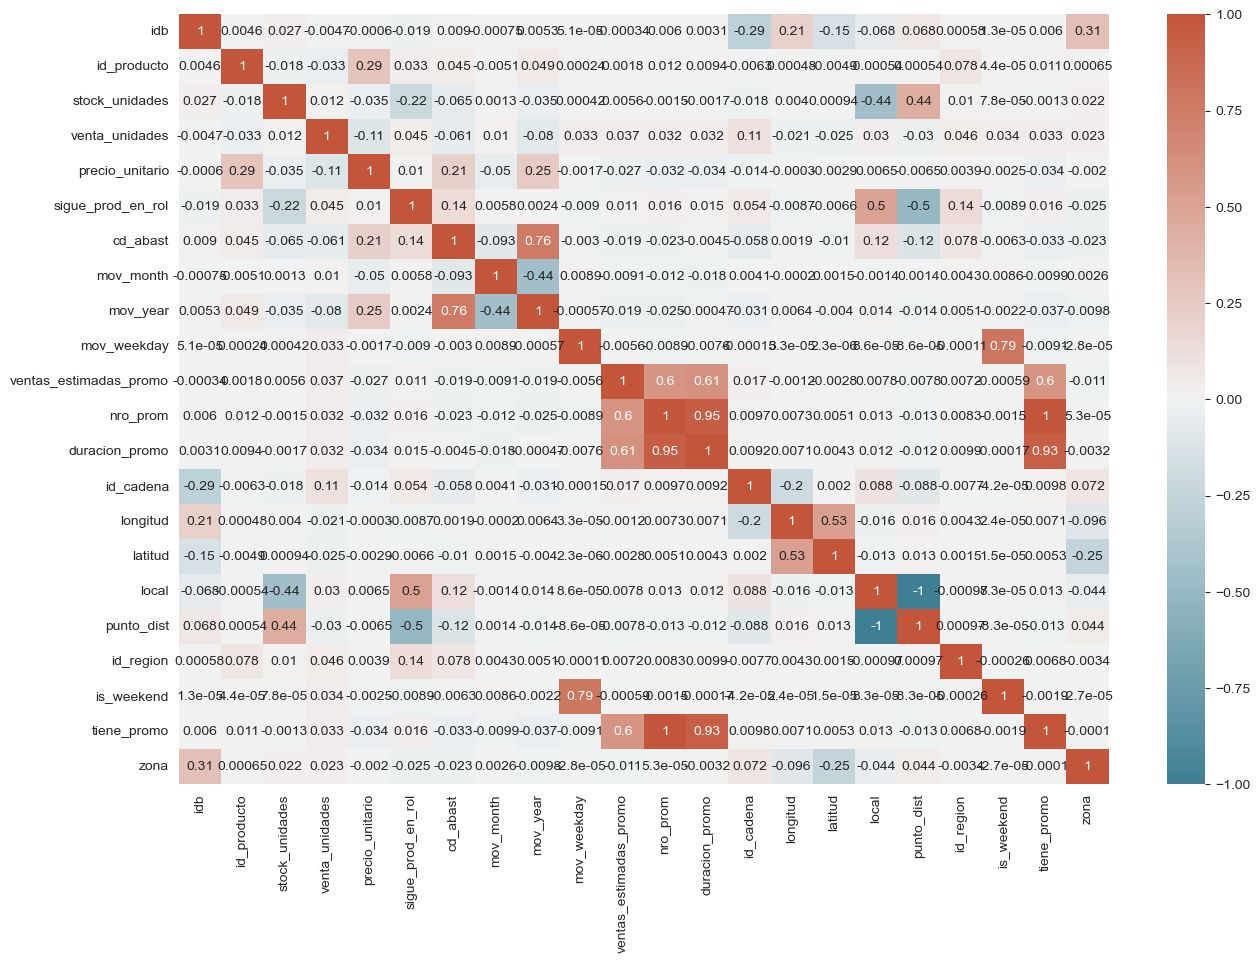

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
correlation_map = sns.heatmap(deodorants_df.corr(),
                              cmap=sns.diverging_palette(220, 20,
                              as_cmap=True),
                              annot=True)

fig = correlation_map.get_figure()
fig.savefig("images/correlation_map.png")

plt.show()

In [134]:
def get_high_correlations(df, threshold=0.3):
    """
    Get variables with a correlation coefficient above or below a threshold.
    """
    corr_matrix = df.corr()
    high_corrs = (corr_matrix.abs() >= threshold) & (corr_matrix.abs() < 1.0)
    high_corrs_vars = []
    for col in high_corrs:
        corr_vars = list(high_corrs.index[high_corrs[col]])
        for var in corr_vars:
            high_corrs_vars.append((col, var, corr_matrix.loc[col, var]))
    high_corrs_vars = sorted(set(high_corrs_vars), key=lambda x: abs(x[2]), reverse=True)
    return high_corrs_vars


high_corr_vars = get_high_correlation_vars(deodorants_df, 'venta_unidades', 0.3)
print(high_corr_vars)


/var/folders/1b/q0vy8pzj2d5_w7tb8dkfmh2m0000gn/T/ipykernel_40068/480955416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()[target_var].reset_index().rename(columns={target_var: 'corr'})


Empty DataFrame
Columns: [index, corr, corr_type]
Index: []


In [138]:
def get_high_correlation_vars(df, threshold=0.8):
    """
    Returns a list of variables with a correlation coefficient
    greater than the specified threshold (positive or negative)
    """
    corr_matrix = df.corr().abs()
    high_corr_vars = []
    for var in corr_matrix:
        corr_values = corr_matrix[var][corr_matrix[var] > threshold].index.tolist()
        if corr_values:
            high_corr_vars.extend(corr_values)
    return list(set(high_corr_vars))

high_corr_vars = get_high_correlation_vars(deodorants_df)
print(high_corr_vars)


/var/folders/1b/q0vy8pzj2d5_w7tb8dkfmh2m0000gn/T/ipykernel_40068/138889008.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


['precio_unitario', 'stock_unidades', 'mov_year', 'punto_dist', 'zona', 'id_cadena', 'venta_unidades', 'cd_abast', 'mov_weekday', 'is_weekend', 'sigue_prod_en_rol', 'mov_month', 'longitud', 'nro_prom', 'latitud', 'id_region', 'local', 'idb', 'ventas_estimadas_promo', 'id_producto', 'duracion_promo', 'tiene_promo']


In [99]:
ventas_por_promo = deodorants_df.groupby(['tiene_promo'])['venta_unidades'].mean()

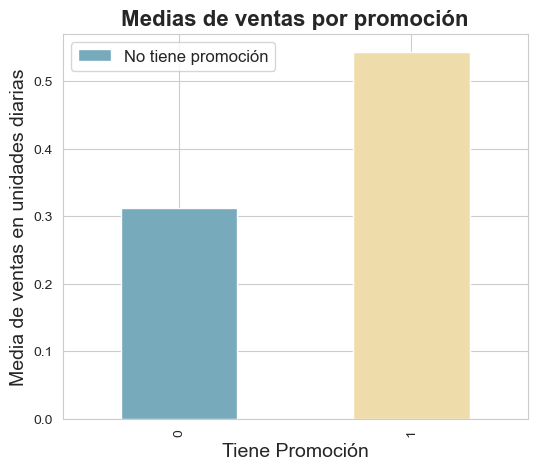

In [100]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(6,5))

colores = ["#7AB", "#EDA"]
ventas_por_promo.plot(kind='bar', ax=ax, color=colores)

# Definir título, etiquetas de eje x e y
ax.set_title('Medias de ventas por promoción', fontsize=16, fontweight='bold')
ax.set_xlabel('Tiene Promoción', fontsize=14)
ax.set_ylabel('Media de ventas en unidades diarias', fontsize=14)

# Agregar leyenda
ax.legend(['No tiene promoción', 'Tiene promoción'], fontsize=12)

plt.savefig('images/ventas_por_promo.png')

# Mostrar gráfico
plt.show()

In [101]:
from scipy.stats import shapiro

# prueba de normalidad para el grupo de desodorantes con promoción
stat, p = shapiro(deodorants_df[deodorants_df['tiene_promo']==1]['venta_unidades'])
print('Desodorantes con promoción:\nEstadístico=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('La muestra parece Gaussiana (no se puede rechazar H0)')
else:
    print('La muestra no parece Gaussiana (se rechaza H0)')

# prueba de normalidad para el grupo de desodorantes sin promoción
stat, p = shapiro(deodorants_df[deodorants_df['tiene_promo']==0]['venta_unidades'])
print('\nDesodorantes sin promoción:\nEstadístico=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('La muestra parece Gaussiana (no se puede rechazar H0)')
else:
    print('La muestra no parece Gaussiana (se rechaza H0)')
    

/usr/local/anaconda3/envs/data_science/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Desodorantes con promoción:
Estadístico=0.534, p-value=0.000
La muestra no parece Gaussiana (se rechaza H0)

Desodorantes sin promoción:
Estadístico=0.374, p-value=0.000
La muestra no parece Gaussiana (se rechaza H0)


In [ ]:
from scipy.stats import mannwhitneyu

# prueba de Wilcoxon-Mann-Whitney para comparar las medias de los dos grupos
stat, p = mannwhitneyu(
    deodorants_df[deodorants_df['tiene_promo'] == 1]['venta_unidades'],
    deodorants_df[deodorants_df['tiene_promo'] == 0]['venta_unidades'],
    alternative='less')
print('Estadístico=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('No se puede rechazar H0')
else:
    print('Se rechaza H0')

In [139]:
cols = [
    'precio_unitario', 'stock_unidades', 'mov_year', 'punto_dist', 'zona',
    'id_cadena', 'venta_unidades', 'cd_abast', 'mov_weekday', 'is_weekend',
    'sigue_prod_en_rol', 'mov_month', 'longitud', 'nro_prom', 'latitud',
    'id_region', 'local', 'idb', 'id_producto',
    'duracion_promo', 'tiene_promo'
]

In [140]:
df_subset = deodorants_df[cols]

In [141]:
df_subset = df_subset.loc[(df_subset['mov_year'] == 2018) | (df_subset['mov_year'] == 2019)]

In [142]:
df_subset.shape

(4802438, 21)

In [143]:
df_subset.to_csv('../data/deodorants_model.csv', index=False)